In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = "./dataset/Resume.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
df.head(5)

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [6]:
df = df[['Category','Resume_str']]
df.head()

,Category,Resume_str
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...
1,HR,"HR SPECIALIST, US HR OPERATIONS ..."
2,HR,HR DIRECTOR Summary Over 2...
3,HR,HR SPECIALIST Summary Dedica...
4,HR,HR MANAGER Skill Highlights ...


# **Data Visualization**

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    2484 non-null   object
 1   Resume_str  2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [8]:
category_counts = df['Category'].value_counts()
print(category_counts)

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


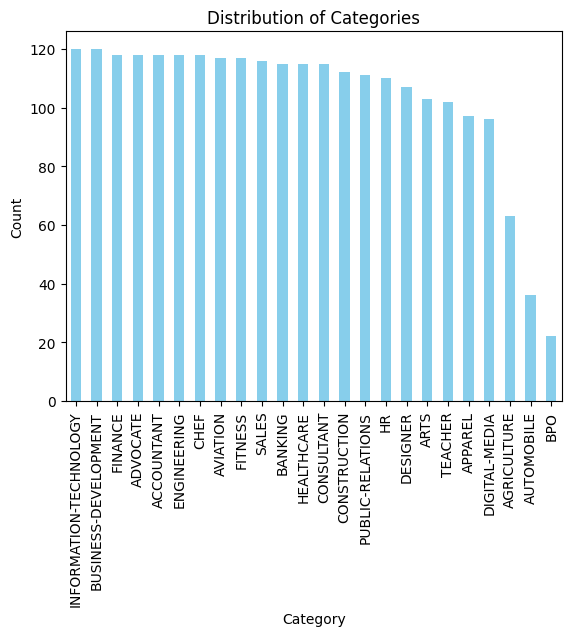

In [9]:
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**Number of words in each resume**

In [10]:
df['Word_Count'] = df['Resume_str'].apply(lambda x: len(str(x).split(" ")))
df[['Resume_str','Word_Count']].head()

,Resume_str,Word_Count
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,1084
1,"HR SPECIALIST, US HR OPERATIONS ...",1060
2,HR DIRECTOR Summary Over 2...,1365
3,HR SPECIALIST Summary Dedica...,578
4,HR MANAGER Skill Highlights ...,1491


**Number of Characters**

In [11]:
df['Char_Count'] = df['Resume_str'].str.len() ## this also includes spaces
df[['Resume_str','Char_Count']].head()

,Resume_str,Char_Count
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,5442
1,"HR SPECIALIST, US HR OPERATIONS ...",5572
2,HR DIRECTOR Summary Over 2...,7720
3,HR SPECIALIST Summary Dedica...,2855
4,HR MANAGER Skill Highlights ...,9172


**Number of Numerics**

In [12]:
df['Numerics'] = df['Resume_str'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Resume_str','Numerics']].head()

,Resume_str,Numerics
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,16
1,"HR SPECIALIST, US HR OPERATIONS ...",5
2,HR DIRECTOR Summary Over 2...,9
3,HR SPECIALIST Summary Dedica...,10
4,HR MANAGER Skill Highlights ...,16


In [13]:
df.head(5)

,Category,Resume_str,Word_Count,Char_Count,Numerics
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,1084,5442,16
1,HR,"HR SPECIALIST, US HR OPERATIONS ...",1060,5572,5
2,HR,HR DIRECTOR Summary Over 2...,1365,7720,9
3,HR,HR SPECIALIST Summary Dedica...,578,2855,10
4,HR,HR MANAGER Skill Highlights ...,1491,9172,16


# **Text Pre-Processing**

In [14]:
df = df[['Category','Resume_str']]

In [15]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

**Tokenization**

In [16]:
nltk.download('punkt')
df['tokens'] = df['Resume_str'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Remove Stop Words**

In [17]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Lemmatization**

In [18]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [19]:
df['processed_resume'] = df['tokens'].apply(lambda x: ' '.join(x))

In [20]:
df.head()

,Category,Resume_str,tokens,processed_resume
0,HR,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"[HR, ADMINISTRATOR/MARKETING, ASSOCIATE, HR, A...",HR ADMINISTRATOR/MARKETING ASSOCIATE HR ADMINI...
1,HR,"HR SPECIALIST, US HR OPERATIONS ...","[HR, SPECIALIST, ,, US, HR, OPERATIONS, Summar...","HR SPECIALIST , US HR OPERATIONS Summary Versa..."
2,HR,HR DIRECTOR Summary Over 2...,"[HR, DIRECTOR, Summary, 20, year, experience, ...",HR DIRECTOR Summary 20 year experience recruit...
3,HR,HR SPECIALIST Summary Dedica...,"[HR, SPECIALIST, Summary, Dedicated, ,, Driven...","HR SPECIALIST Summary Dedicated , Driven , Dyn..."
4,HR,HR MANAGER Skill Highlights ...,"[HR, MANAGER, Skill, Highlights, HR, SKILLS, H...",HR MANAGER Skill Highlights HR SKILLS HR Depar...


In [21]:
df.to_csv("./precessed_df.csv")

**Dataset splitting**

In [22]:
train_sentences, test_sentence, train_labels, test_label = train_test_split(df["processed_resume"].to_numpy(),
                                                                            df["Category"].to_numpy(),
                                                                            test_size=0.2,
                                                                            random_state=42)

In [23]:
len(train_sentences), len(train_labels), len(test_label), len(test_sentence)

(1987, 1987, 497, 497)

In [24]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_sentences,
                                                                            train_labels,
                                                                            test_size=0.1, # dedicate 10% of samples to validation set
                                                                            random_state=42)

In [25]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels), len(test_sentence), len(test_label)


(1788, 1788, 199, 199, 497, 497)

# **Feature extraction**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

In [27]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')
x_train = tfidf_vector.fit_transform(train_sentences)
x_test = tfidf_vector.transform(test_sentence)

In [28]:
x_train.shape, x_test.shape

((1788, 32167), (497, 32167))

In [ ]:
with open('tfidf_vector.pkl', 'wb') as f:
    pickle.dump(tfidf_vector, f)

# **Model Training**

In [29]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score

In [30]:
y_train = train_labels
y_test = test_label

**KNN Classifier**

In [31]:
model_knn = KNeighborsClassifier(n_neighbors=24)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.60
Accuracy of  test set    : 0.56
Classification report for classifier KNeighborsClassifier(n_neighbors=24):
                        precision    recall  f1-score   support

            ACCOUNTANT       0.63      0.93      0.75        29
              ADVOCATE       0.50      0.43      0.46        30
           AGRICULTURE       1.00      0.12      0.22         8
               APPAREL       0.46      0.30      0.36        20
                  ARTS       0.00      0.00      0.00        18
            AUTOMOBILE       0.33      0.17      0.22         6
              AVIATION       0.65      0.62      0.63        21
               BANKING       0.78      0.61      0.68        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.49      0.67      0.56        27
                  CHEF       0.77      0.71      0.74        24
          CONSTRUCTION       0.83      0.71      0.76        34
            CONSULTANT      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**Decision Tree Classifier**

In [32]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.58
Classification report for classifier DecisionTreeClassifier():
                        precision    recall  f1-score   support

            ACCOUNTANT       0.89      0.86      0.88        29
              ADVOCATE       0.80      0.67      0.73        30
           AGRICULTURE       0.18      0.25      0.21         8
               APPAREL       0.29      0.25      0.27        20
                  ARTS       0.21      0.28      0.24        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.55      0.76      0.64        21
               BANKING       0.59      0.57      0.58        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.38      0.37      0.38        27
                  CHEF       0.83      0.62      0.71        24
          CONSTRUCTION       0.85      0.85      0.85        34
            CONSULTANT       0.50      0

**Random Forest Classifier**

In [33]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.65
Classification report for classifier RandomForestClassifier(n_estimators=200):
                        precision    recall  f1-score   support

            ACCOUNTANT       0.69      0.93      0.79        29
              ADVOCATE       0.87      0.67      0.75        30
           AGRICULTURE       0.67      0.25      0.36         8
               APPAREL       0.82      0.45      0.58        20
                  ARTS       0.20      0.06      0.09        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.82      0.86      0.84        21
               BANKING       0.77      0.74      0.76        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.80      0.59      0.68        27
                  CHEF       0.82      0.75      0.78        24
          CONSTRUCTION       0.87      0.79      0.83        34
            CONSULTANT  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**Support Vectore Machine (SVM) Classifier**

In [34]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.58
Classification report for classifier SVC():
                        precision    recall  f1-score   support

            ACCOUNTANT       0.75      0.83      0.79        29
              ADVOCATE       0.48      0.50      0.49        30
           AGRICULTURE       1.00      0.12      0.22         8
               APPAREL       0.88      0.35      0.50        20
                  ARTS       0.17      0.11      0.13        18
            AUTOMOBILE       0.00      0.00      0.00         6
              AVIATION       0.68      0.81      0.74        21
               BANKING       0.83      0.65      0.73        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.59      0.63      0.61        27
                  CHEF       1.00      0.62      0.77        24
          CONSTRUCTION       0.85      0.68      0.75        34
            CONSULTANT       0.22      0.35      0.27      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**Bagging Classifier**

In [35]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.67
Accuracy of  test set    : 0.51
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                        precision    recall  f1-score   support

            ACCOUNTANT       0.65      0.90      0.75        29
              ADVOCATE       0.47      0.27      0.34        30
           AGRICULTURE       0.00      0.00      0.00         8
               APPAREL       0.50      0.20      0.29        20
                  ARTS       0.17      0.11      0.13        18
            AUTOMOBILE       0.50      0.17      0.25         6
              AVIATION       0.80      0.57      0.67        21
               BANKING       0.70      0.61      0.65        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.18      0.81      0.29        27
                  CHEF       0.78      0.75      0.77        24
          CONSTRUCTION  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**Gradient Boosting Classifier**

In [36]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.86
Accuracy of  test set    : 0.60
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                        precision    recall  f1-score   support

            ACCOUNTANT       0.83      0.86      0.85        29
              ADVOCATE       0.81      0.73      0.77        30
           AGRICULTURE       0.67      0.75      0.71         8
               APPAREL       0.78      0.35      0.48        20
                  ARTS       0.36      0.22      0.28        18
            AUTOMOBILE       0.22      0.33      0.27         6
              AVIATION       0.69      0.86      0.77        21
               BANKING       0.53      0.35      0.42        23
                   BPO       0.00      0.00      0.00         2
  BUSINESS-DEVELOPMENT       0.61      0.52      0.56        27
                  CHEF       0.89      0.67      0.76        24
          CONSTRUCTION       0.84      0.62      0.71 